# **Introduction to Backpropagation**

Backpropagation is a critical algorithm for training neural networks. It is the process through which the network adjusts its weights based on the error between the predicted and actual values.

In this tutorial, we will explore how backpropagation works step-by-step, demonstrating how the error is propagated backward through the layers to adjust the weights of the network, improving its predictions over time.

By the end of this tutorial, you'll understand the key concepts:
1. **Forward pass**: Input data flows through the network.
2. **Loss computation**: The error between the predicted and true values is calculated.
3. **Backpropagation**: The error is propagated backward through the network.
4. **Gradient descent**: Weights are updated to minimize the error.

Let's dive into the details and implement backpropagation step-by-step!

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
from tensorflow.keras import layers, models, Input
from sklearn.model_selection import train_test_split

# **Backpropagation with Neural Networks**
In this tutorial, we will walk through the process of understanding and implementing backpropagation in a neural network and we'll use the MNIST dataset to demonstrate **backpropagation**, a fundamental technique for training neural networks.
The MNIST dataset consists of 60,000 28x28 grayscale images of handwritten digits (0-9) and 10,000 test images.

Then, we will experiment by adding more hidden layers and changing the number of neurons to see how these changes affect the model's training time and accuracy. By the end of this tutorial, you will have a deeper understanding of how backpropagation helps train neural networks and how architectural decisions impact model performance.





**Load the MNIST Dataset**

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to a range of [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**Create the Neural Network Model**

We’ll use a simple feedforward neural network with one hidden layer.


In [3]:
# Create the Neural Network Model
model = models.Sequential([
    Input(shape=(28, 28)),  # Explicitly define the input shape
    layers.Flatten(),        # Flatten the 28x28 image
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
])

# Compile the model with an Adam optimizer, sparse categorical cross-entropy loss, and accuracy metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


**Training the Model and Explaining Backpropagation**

In [4]:
# Train the model with the training data
history = model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8784 - loss: 0.4323
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9638 - loss: 0.1221
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9768 - loss: 0.0782
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9837 - loss: 0.0544
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9851 - loss: 0.0462


**Evaluating the Model**

In [5]:
# Evaluate the model's performance on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9754 - loss: 0.0846
Test accuracy: 0.9790999889373779


**Visualizing the Loss Over Epochs**

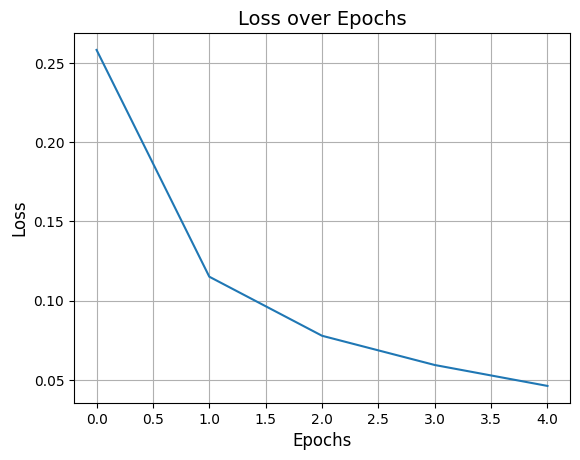

In [6]:
# Plotting the loss over epochs with color-blind friendly colors
plt.plot(history.history['loss'], color='tab:blue')  # Use color-blind friendly color

# Add title and labels with larger font sizes for accessibility
plt.title('Loss over Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)

# Add a grid for better readability
plt.grid(True)

# Save the loss plot as a .png file with high resolution
plt.savefig('loss.png', dpi=300)

# Show the plot
plt.show()


**Visualizing Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


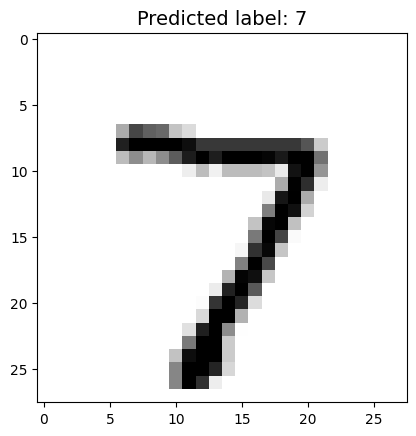

In [7]:
# Display the test image and its predicted label
plt.imshow(test_images[0], cmap=plt.cm.binary)  # Grayscale image, binary colormap

# Add title with high contrast for accessibility
predicted_label = model.predict(test_images[0:1]).argmax()
plt.title(f"Predicted label: {predicted_label}", fontsize=14, color='black')  # Black title for contrast

# Add grid for better readability (optional)
plt.grid(False)  # We may not want a grid on image plots

# Save the image with the prediction title
plt.savefig('predicted_image.png', dpi=300)  # Save as PNG with high resolution

# Show the plot
plt.show()



## **Experiment with Adding More Hidden Layers**
Once we have a simple model working, the next step is to experiment with adding more layers to the network. By doing so, we can **increase the complexity of the model** and enable it to learn more sophisticated patterns. Adding layers also helps the network capture more hierarchical representations of the data.

**Add a Second and Third Hidden Layer**

Let’s add another hidden layer to the model. This introduces more complexity, allowing the model to learn more advanced features.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8483 - loss: 0.5160 - val_accuracy: 0.9577 - val_loss: 0.1391
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9641 - loss: 0.1189 - val_accuracy: 0.9679 - val_loss: 0.1065
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9749 - loss: 0.0827 - val_accuracy: 0.9691 - val_loss: 0.1057
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9814 - loss: 0.0605 - val_accuracy: 0.9723 - val_loss: 0.0949
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9839 - loss: 0.0503 - val_accuracy: 0.9728 - val_loss: 0.0953
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9877 - loss: 0.0375 - val_accuracy: 0.9711 - val_loss: 0.1150
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9742 - val_loss: 0.1002
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9714 - loss: 0.0933
Test accuracy: 

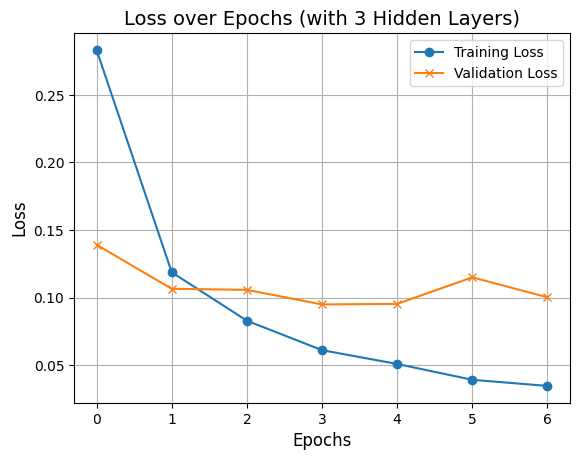

In [8]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the images to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the neural network with three hidden layers
model = models.Sequential([
    Input(shape=(28, 28)),                 # Explicitly define the input shape
    layers.Flatten(),                     # Flatten the 28x28 image
    layers.Dense(128, activation='relu'), # First hidden layer
    layers.Dense(64, activation='relu'),  # Second hidden layer
    layers.Dense(32, activation='relu'),  # Third hidden layer
    layers.Dense(10, activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add early stopping for better convergence
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with validation split
history = model.fit(train_images, train_labels, validation_split=0.2, epochs=10, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot the training and validation loss with accessibility features
plt.plot(history.history['loss'], color='tab:blue', marker='o', label='Training Loss')  # Training Loss
plt.plot(history.history['val_loss'], color='tab:orange', marker='x', label='Validation Loss')  # Validation Loss
plt.title('Loss over Epochs (with 3 Hidden Layers)', fontsize=14, color='black')  # Accessible title
plt.xlabel('Epochs', fontsize=12, color='black')
plt.ylabel('Loss', fontsize=12, color='black')
plt.legend()
plt.grid(True)

# Save the plot with high resolution for professional usage
plt.savefig('loss_plot.png', dpi=300)

# Show the plot
plt.show()


# **Experimenting with Different Layer Configurations:**

In [9]:
def create_model(hidden_layers=1, neurons=128):
    model = models.Sequential()

    # Specify input shape with an Input layer
    model.add(layers.Input(shape=(28, 28)))  # Input layer for MNIST images (28x28 pixels)

    # Add hidden layers
    for _ in range(hidden_layers):
        model.add(layers.Dense(neurons, activation='relu'))

    model.add(layers.Flatten())  # Flatten the 28x28 images to 1D vector
    model.add(layers.Dense(10, activation='softmax'))  # Output layer for classification

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [10]:
# Define the number of epochs
epochs = 10

# Split your training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)  # 80% for training, 20% for validation

# Create lists to store results
results = {}

# Experiment with different configurations
for hidden_layers in [1, 2, 3]:  # Vary the number of hidden layers
    for neurons in [64, 128, 256]:  # Vary the number of neurons per layer
        print(f"Training model with {hidden_layers} hidden layers and {neurons} neurons")

        # Create the model with the current configuration
        model = create_model(hidden_layers=hidden_layers, neurons=neurons)

        # Train the model using validation_split
        # This automatically creates validation data from the training data.
        history = model.fit(train_images, train_labels, epochs=epochs,
                            validation_data=(val_images, val_labels),
                            verbose=0)

        # Store the results
        results[(hidden_layers, neurons)] = history.history

Training model with 1 hidden layers and 64 neurons
Training model with 1 hidden layers and 128 neurons
Training model with 1 hidden layers and 256 neurons
Training model with 2 hidden layers and 64 neurons
Training model with 2 hidden layers and 128 neurons
Training model with 2 hidden layers and 256 neurons
Training model with 3 hidden layers and 64 neurons
Training model with 3 hidden layers and 128 neurons
Training model with 3 hidden layers and 256 neurons


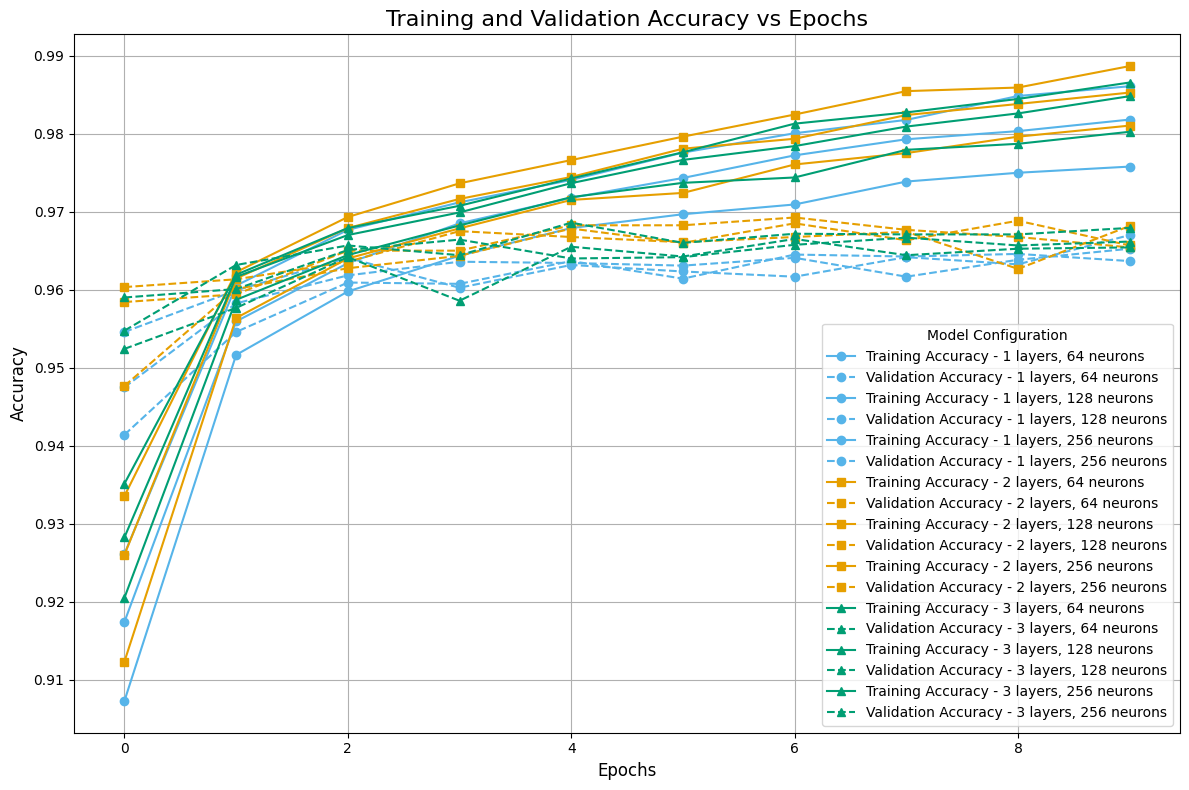

In [11]:
# Colorblind-friendly color palette (Blue, Orange, Green)
colors = ['#56B4E9', '#E69F00', '#009E73']  # Blue, Orange, Green
markers = ['o', 's', '^']  # Circle, Square, Triangle

# Plotting the results
plt.figure(figsize=(12, 8))

# Loop over the results and plot each configuration
for (hidden_layers, neurons), history in results.items():
    plt.plot(history['accuracy'], label=f'Training Accuracy - {hidden_layers} layers, {neurons} neurons',
             color=colors[(hidden_layers - 1) % 3], marker=markers[(hidden_layers - 1) % 3])
    plt.plot(history['val_accuracy'], label=f'Validation Accuracy - {hidden_layers} layers, {neurons} neurons',
             color=colors[(hidden_layers - 1) % 3], linestyle='--', marker=markers[(hidden_layers - 1) % 3])

# Add title and labels
plt.title('Training and Validation Accuracy vs Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Adding a legend with clearer labels
plt.legend(title="Model Configuration", loc="lower right")

# Adding grid and layout adjustments
plt.grid(True)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('training_validation_accuracy_comparison.png', dpi=300)

# Display the plot
plt.show()


# **Comparison of Optimization Algorithms in Neural Networks**

**Experiment 1**: Using Stochastic Gradient Descent (SGD) SGD is the simplest and most commonly used optimizer. You can use it with a fixed learning rate or with momentum.

In [12]:
# Define the model architecture
def create_model(optimizer):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Use SGD optimizer
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
sgd_model = create_model(sgd_optimizer)

# Train the model
history_sgd = sgd_model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss_sgd, test_acc_sgd = sgd_model.evaluate(test_images, test_labels)
print(f"SGD Test accuracy: {test_acc_sgd}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8463 - loss: 0.5348 - val_accuracy: 0.9469 - val_loss: 0.1799
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9497 - loss: 0.1732 - val_accuracy: 0.9573 - val_loss: 0.1407
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9669 - loss: 0.1161 - val_accuracy: 0.9685 - val_loss: 0.1045
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9732 - loss: 0.0893 - val_accuracy: 0.9717 - val_loss: 0.0928
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9801 - loss: 0.0699 - val_accuracy: 0.9738 - val_loss: 0.0864
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9692 - loss: 0.1019
SGD Test accuracy: 0.973800003528595


**Experiment 2:** Using Adam Optimizer
Adam generally converges faster and performs better in many cases. Let’s train the model using Adam.

In [13]:
# Use Adam optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
adam_model = create_model(adam_optimizer)

# Train the model
history_adam = adam_model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss_adam, test_acc_adam = adam_model.evaluate(test_images, test_labels)
print(f"Adam Test accuracy: {test_acc_adam}")

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8656 - loss: 0.4787 - val_accuracy: 0.9550 - val_loss: 0.1527
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9619 - loss: 0.1365 - val_accuracy: 0.9678 - val_loss: 0.1110
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9728 - loss: 0.0922 - val_accuracy: 0.9721 - val_loss: 0.0921
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9809 - loss: 0.0639 - val_accuracy: 0.9754 - val_loss: 0.0793
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9871 - loss: 0.0458 - val_accuracy: 0.9751 - val_loss: 0.0811
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9697 - loss: 0.1011
Adam Test accuracy: 0.9750999808311462


**Experiment 3:** Using RMSprop Optimizer RMSprop adjusts the learning rate based on the moving average of the squared gradients. It’s particularly useful for recurrent neural networks and can work well with online learning.

In [14]:
# Use RMSprop optimizer
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
rmsprop_model = create_model(rmsprop_optimizer)

# Train the model
history_rmsprop = rmsprop_model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss_rmsprop, test_acc_rmsprop = rmsprop_model.evaluate(test_images, test_labels)
print(f"RMSprop Test accuracy: {test_acc_rmsprop}")


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8709 - loss: 0.4515 - val_accuracy: 0.9530 - val_loss: 0.1604
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9593 - loss: 0.1442 - val_accuracy: 0.9670 - val_loss: 0.1093
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9737 - loss: 0.0894 - val_accuracy: 0.9700 - val_loss: 0.1008
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9783 - loss: 0.0727 - val_accuracy: 0.9738 - val_loss: 0.0916
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9832 - loss: 0.0570 - val_accuracy: 0.9728 - val_loss: 0.0906
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9696 - loss: 0.1001
RMSprop Test accuracy: 0.9728000164031982


**Plot the Results:** Compare Optimizers To visually compare the three optimizers, plot the training loss and validation accuracy over epochs for each optimizer. This will help you understand how each optimizer converges and generalizes.

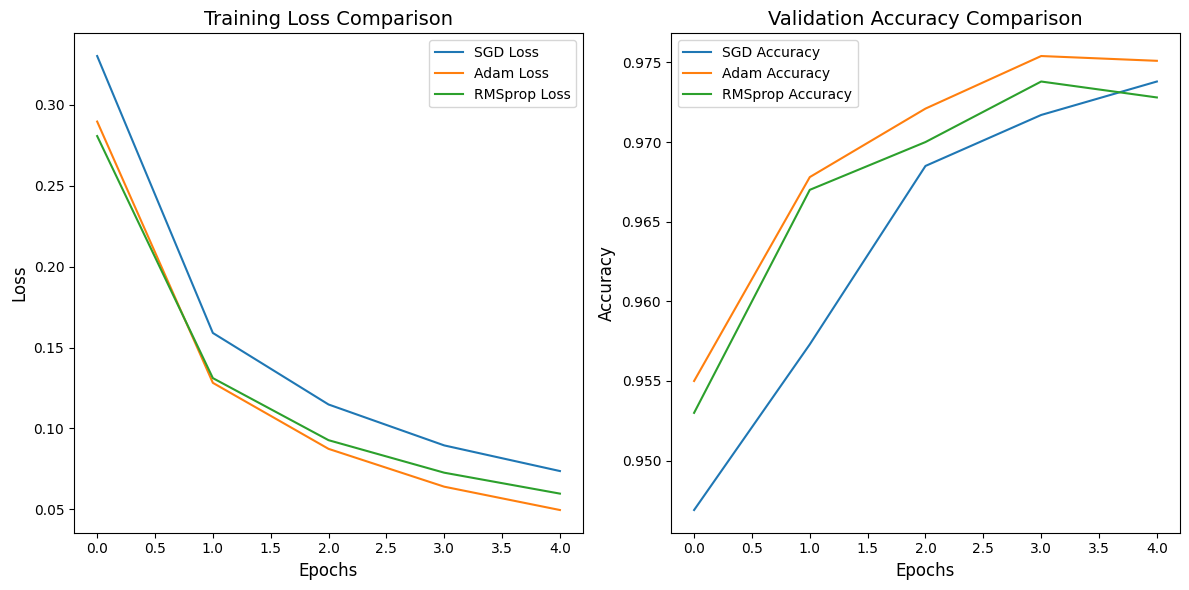

In [15]:
# Set up the figure with increased size
plt.figure(figsize=(12, 6))

# Training loss comparison (color-blind friendly)
plt.subplot(1, 2, 1)
plt.plot(history_sgd.history['loss'], label='SGD Loss', color='tab:blue')  # Blue for SGD
plt.plot(history_adam.history['loss'], label='Adam Loss', color='tab:orange')  # Orange for Adam
plt.plot(history_rmsprop.history['loss'], label='RMSprop Loss', color='tab:green')  # Green for RMSprop
plt.title('Training Loss Comparison', fontsize=14, color='black')
plt.xlabel('Epochs', fontsize=12, color='black')
plt.ylabel('Loss', fontsize=12, color='black')
plt.legend()

# Validation accuracy comparison (color-blind friendly)
plt.subplot(1, 2, 2)
plt.plot(history_sgd.history['val_accuracy'], label='SGD Accuracy', color='tab:blue')  # Blue for SGD
plt.plot(history_adam.history['val_accuracy'], label='Adam Accuracy', color='tab:orange')  # Orange for Adam
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop Accuracy', color='tab:green')  # Green for RMSprop
plt.title('Validation Accuracy Comparison', fontsize=14, color='black')
plt.xlabel('Epochs', fontsize=12, color='black')
plt.ylabel('Accuracy', fontsize=12, color='black')
plt.legend()

# Tight layout for better spacing between subplots
plt.tight_layout()

# Save the plot with high resolution (300 dpi) for clarity
plt.savefig('loss_accuracy_comparison.png', dpi=300)  # Save as PNG file

# Show the plot
plt.show()


### **By using interactive sliders**, users can experiment with different configurations like learning rate, epochs, and batch size, and observe how these changes impact the model's performance in real-time

In [16]:
import ipywidgets as widgets
from tensorflow.keras import models, layers, Input
import matplotlib.pyplot as plt

# Define sliders for interactive learning rate and epochs
learning_rate_slider = widgets.FloatSlider(
    value=0.01,  # default learning rate
    min=0.0001,  # minimum value
    max=0.1,     # maximum value
    step=0.0001,  # step size
    description='Learning Rate:',
    continuous_update=False
)

epochs_slider = widgets.IntSlider(
    value=100,   # default number of epochs
    min=10,      # minimum number of epochs
    max=500,     # maximum number of epochs
    step=10,     # step size
    description='Epochs:',
    continuous_update=False
)

batch_size_slider = widgets.IntSlider(
    value=32,    # default batch size
    min=8,       # minimum batch size
    max=128,     # maximum batch size
    step=8,      # step size
    description='Batch Size:',
    continuous_update=False
)

# Display the sliders in the notebook
display(learning_rate_slider, epochs_slider, batch_size_slider)

# Function to train the model with selected hyperparameters
def train_model(learning_rate, epochs, batch_size):
    # Define the model
    model = models.Sequential([
        Input(shape=(28, 28)),  # Explicitly define the input shape
        layers.Flatten(),        # Flatten the 28x28 image
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model with the selected learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model with the selected epochs and batch size
    history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=0)

    # Evaluate the model on test data
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    # Plot the loss over epochs
    plt.plot(history.history['loss'], color='tab:blue')
    plt.title(f'Loss over epochs (Epochs={epochs}, Batch Size={batch_size})', fontsize=14, color='black')
    plt.xlabel('Epochs', fontsize=12, color='black')
    plt.ylabel('Loss', fontsize=12, color='black')
    plt.grid(True)

    # Save the plot with high resolution (300 dpi) for clarity
    plt.savefig(f'loss_plot_lr{learning_rate}_epochs{epochs}_batch{batch_size}.png', dpi=300)  # Save as PNG file

    plt.show()

    return test_acc

# Use interactive_output to link sliders to model training
output = widgets.interactive_output(train_model,
                                    {'learning_rate': learning_rate_slider,
                                     'epochs': epochs_slider,
                                     'batch_size': batch_size_slider})

# Display the interactive output
display(output)


FloatSlider(value=0.01, continuous_update=False, description='Learning Rate:', max=0.1, min=0.0001, step=0.000…

IntSlider(value=100, continuous_update=False, description='Epochs:', max=500, min=10, step=10)

IntSlider(value=32, continuous_update=False, description='Batch Size:', max=128, min=8, step=8)

Output()